In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [4]:
#read in DF remove unecessary column
Austin = pd.read_csv('Austin_Crime_Clustered.csv')
Austin = Austin.drop('Unnamed: 0', axis = 1)
Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159462,Austin TX 78741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#DataFrame adjusted to only those columns that have a 'primary_type', which will derive our target
Austin = Austin.dropna(axis = 0, how = 'any', subset = ['primary_type'])
Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,NaN,Theft,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,NaN,Theft,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,-97.645133,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,-97.744910,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN


In [6]:
#checking to see if this column would make for a better target, negative
Austin['description'].value_counts(dropna = False)

THEFT                             21782
BURGLARY OF VEHICLE               19439
THEFT BY SHOPLIFTING               8410
BURGLARY OF RESIDENCE              7218
AUTO THEFT                         4206
THEFT OF BICYCLE                   2888
BURGLARY NON RESIDENCE             2846
AGG ASSAULT                        1299
THEFT FROM AUTO                    1118
AGG ASLT STRANGLE/SUFFOCATE        1085
THEFT OF LICENSE PLATE              907
THEFT FROM PERSON                   888
AGG ROBBERY/DEADLY WEAPON           850
ROBBERY BY ASSAULT                  734
AGG ASSAULT FAM/DATE VIOLENCE       683
RAPE                                670
BURG NON RESIDENCE SHEDS            520
THEFT FROM BUILDING                 510
THEFT OF AUTO PARTS                 478
THEFT OF METAL                      423
THEFT OF VEHICLE/OTHER              367
AGG ASLT ENHANC STRANGL/SUFFOC      243
BURGLARY OF COIN-OP MACHINE         242
DEADLY CONDUCT                      218
AGG RAPE OF A CHILD                 192


In [7]:
Austin['primary_type'].value_counts(dropna = False)        ###### TARGET (right now) ######

Theft                                           28274
Theft: All Other Larceny                        13539
Theft: BOV                                      10545
Burglary /                                       5670
Burglary                                         4927
Theft: Shoplifting                               4284
Auto Theft                                       4206
Agg Assault                                      1915
Aggravated Assault                               1888
Robbery                                          1809
Rape                                             1042
Theft: Pocket Picking                             448
Theft: Auto Parts                                 231
Theft: from Building                              221
Theft: Coin Op Machine                            153
Homicide: Murder & Nonnegligent Manslaughter       32
Murder                                             23
Theft: Purse Snatching                              7
Name: primary_type, dtype: i

In [8]:
#Get crime types as array of strings
unique_types = Austin['primary_type'].unique()
unique_types

array(['Theft', 'Theft: Shoplifting', 'Auto Theft', 'Burglary',
       'Theft: All Other Larceny', 'Theft: BOV', 'Agg Assault',
       'Burglary / ', 'Aggravated Assault', 'Rape', 'Robbery',
       'Theft: from Building', 'Theft: Pocket Picking',
       'Theft: Auto Parts', 'Theft: Coin Op Machine',
       'Homicide: Murder & Nonnegligent Manslaughter', 'Murder',
       'Theft: Purse Snatching'], dtype=object)

In [9]:
# make an array to include only those crimes with Theft in title
thefts = []
for crime in unique_types:
    if type(crime) == float:
        continue
    else:
        if 'Theft' in crime:
            thefts.append(crime)
thefts

['Theft',
 'Theft: Shoplifting',
 'Auto Theft',
 'Theft: All Other Larceny',
 'Theft: BOV',
 'Theft: from Building',
 'Theft: Pocket Picking',
 'Theft: Auto Parts',
 'Theft: Coin Op Machine',
 'Theft: Purse Snatching']

In [18]:
non_severe = thefts[:2] + thefts[3:]
non_severe

['Theft',
 'Theft: Shoplifting',
 'Theft: All Other Larceny',
 'Theft: BOV',
 'Theft: from Building',
 'Theft: Pocket Picking',
 'Theft: Auto Parts',
 'Theft: Coin Op Machine',
 'Theft: Purse Snatching']

In [39]:
#derive and append boolean target feature based on whether the wol
Austin['severe'] = Austin['primary_type'].apply((lambda x: True if x not in non_severe else False))
Austin.name = 'All crimes DataFrame'
Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,Theft,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,Theft,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False


In [37]:
severe_df = Austin[Austin['severe']==True]
severe_df.name = 'Severe DataFrame'
severe_df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe
9,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,...,Auto Theft,2014-04-04 00:00:00,2.014941e+09,3118304.0,10072414.0,2014.0,78702.0,1.0,0.0,True
11,11001 CAIRNHILL CT Austin TX 78754,18.559999999999999,2015-05-19 00:00:00,Not cleared,1.0,BURGLARY NON RESIDENCE,C,NaN,NaN,11001 CAIRNHILL CT,...,Burglary,2015-05-15 00:00:00,2.015502e+10,3152073.0,10100014.0,2015.0,78754.0,0.0,NaN,True
17,(30.271198 -97.705609),8.02,2014-12-19 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.271198,(30.271198-97.705609),3506 WEBBERVILLE RD,...,Auto Theft,2014-12-18 00:00:00,2.014352e+10,3125976.0,10072207.0,2014.0,78702.0,1.0,0.0,True
33,10713 TOPPERWEIN DR Austin TX 78758,18.21,2015-03-30 00:00:00,Cleared by Exception,4.0,AUTO THEFT,E,NaN,NaN,10713 TOPPERWEIN DR,...,Auto Theft,2015-03-29 00:00:00,2.015881e+09,3124933.0,10113515.0,2015.0,78758.0,0.0,NaN,True
43,6409 SPRINGDALE RD Austin TX 78723,21.08,2015-04-22 00:00:00,Cleared by Exception,1.0,AGG ASLT STRANGLE/SUFFOCATE,C,NaN,NaN,6409 SPRINGDALE RD,...,Agg Assault,2015-04-16 00:00:00,2.015106e+10,3137140.0,10085508.0,2015.0,78723.0,0.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159401,5701 S MOPAC EXPY NB Austin TX 78749,17.5,2015-01-28 00:00:00,Not cleared,8.0,BURGLARY OF RESIDENCE,D,NaN,NaN,5701 S MOPAC EXPY NB,...,Burglary,2015-01-15 00:00:00,2.015150e+09,3087906.0,10055406.0,2015.0,78749.0,1.0,NaN,True
159418,(30.372228 -97.700074),18.22,2014-11-07 00:00:00,Not cleared,4.0,AGG ASLT STRANGLE/SUFFOCATE,E,30.372228,(30.372228-97.700074),9920 QUAIL BLVD,...,Aggravated Assault,2014-10-09 00:00:00,2.014282e+10,3126909.0,10109014.0,2014.0,78758.0,0.0,1.0,True
159421,12221 N MOPAC EXPY SVRD NB Austin TX 78758,18.5,2015-12-08 00:00:00,Cleared by Arrest,7.0,AGG ASSAULT,A,NaN,NaN,12221 N MOPAC EXPY SVRD NB,...,Agg Assault,2015-12-07 00:00:00,2.015341e+10,3124636.0,10124176.0,2015.0,78758.0,0.0,NaN,True
159425,(30.310835 -97.689597),21.06,2014-10-08 00:00:00,Not cleared,1.0,BURGLARY OF RESIDENCE,I,30.310835,(30.310835-97.689597),5800 BELMOOR DR,...,Burglary /,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,True


In [36]:
theft_df = Austin[Austin['severe']==False]
theft_df.name = 'Theft DataFrame'
theft_df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,Theft,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,Theft,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159450,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,...,Theft: All Other Larceny,2014-11-25 00:00:00,2.014505e+10,3139137.0,10088360.0,2014.0,78724.0,0.0,1.0,False
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False


In [14]:
#create categorical value_counts dictionary
def value_counts_dict_on_frame(df, columns):
    res = {}           # dictionary with column name as key, value_counts Series as key
    for c in columns:
        res[c] = df[c].value_counts(dropna = False)
    return res

In [29]:
categorical_columns = ['clearance_status', 'council_district_code', 
                    'district', 'primary_type', 'year', 'zipcode', 'x_y_cluster', 'long_lat_cluster', 'severe']
feature_categorical_columns = categorical_columns[:-1]

In [41]:
#plot distributions of certain columns function
def plot_distributions(df, columns):
    fig, axs = plt.subplots(len(columns), figsize = (20, 20))
    for i,column in zip(axs.flatten(), columns):
        array = df[column]
        array.hist(ax = i)
        i.set_title(f'{column} distribution in {df.name}')
        i.set_xlabel(f'{column} value')
        i.set_ylabel(f'# of occurences in {df.name}')
    fig.tight_layout()

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

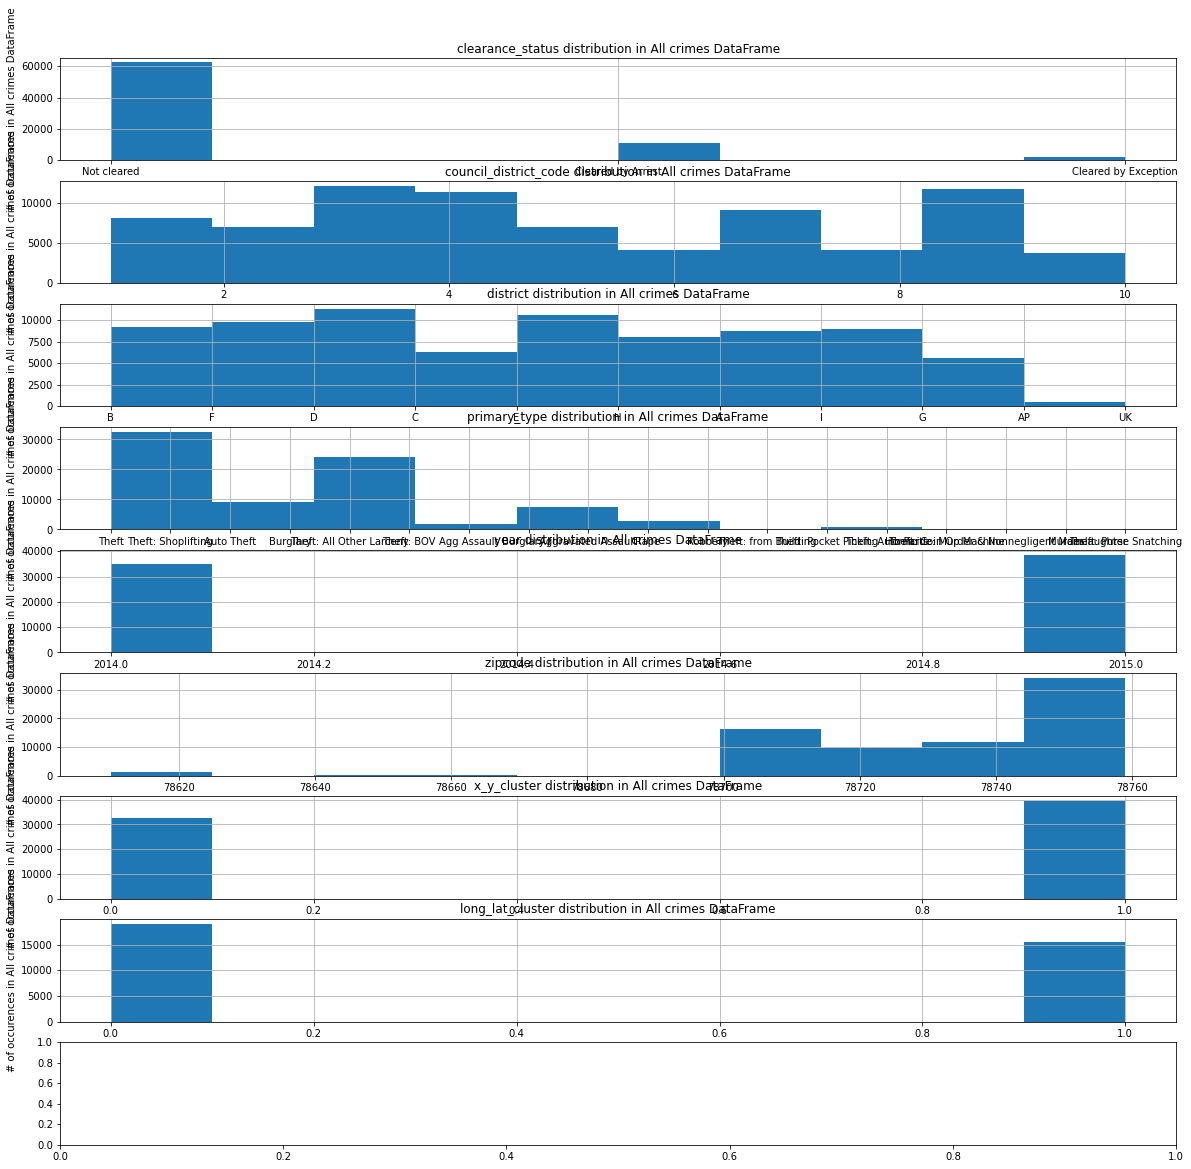

In [42]:
plot_distributions(Austin, categorical_columns)

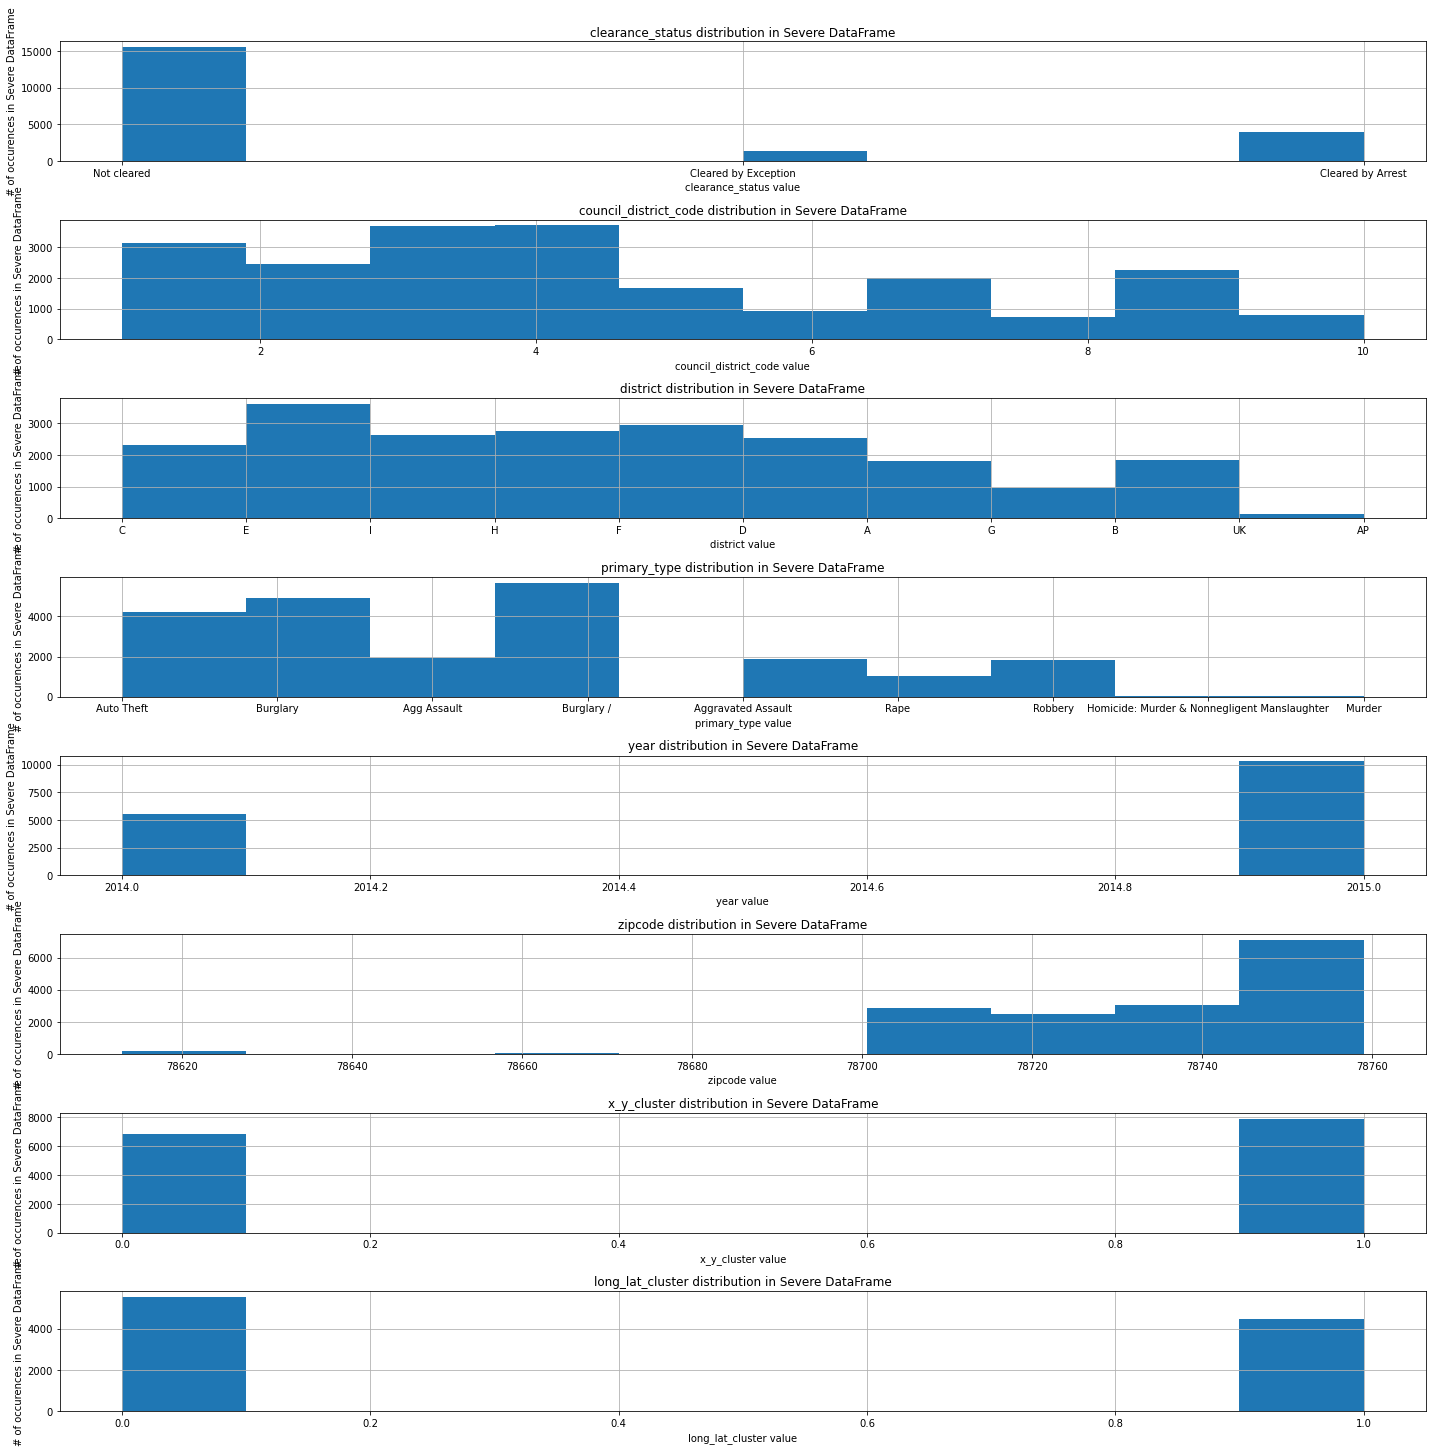

In [43]:
plot_distributions(severe_df, feature_categorical_columns)

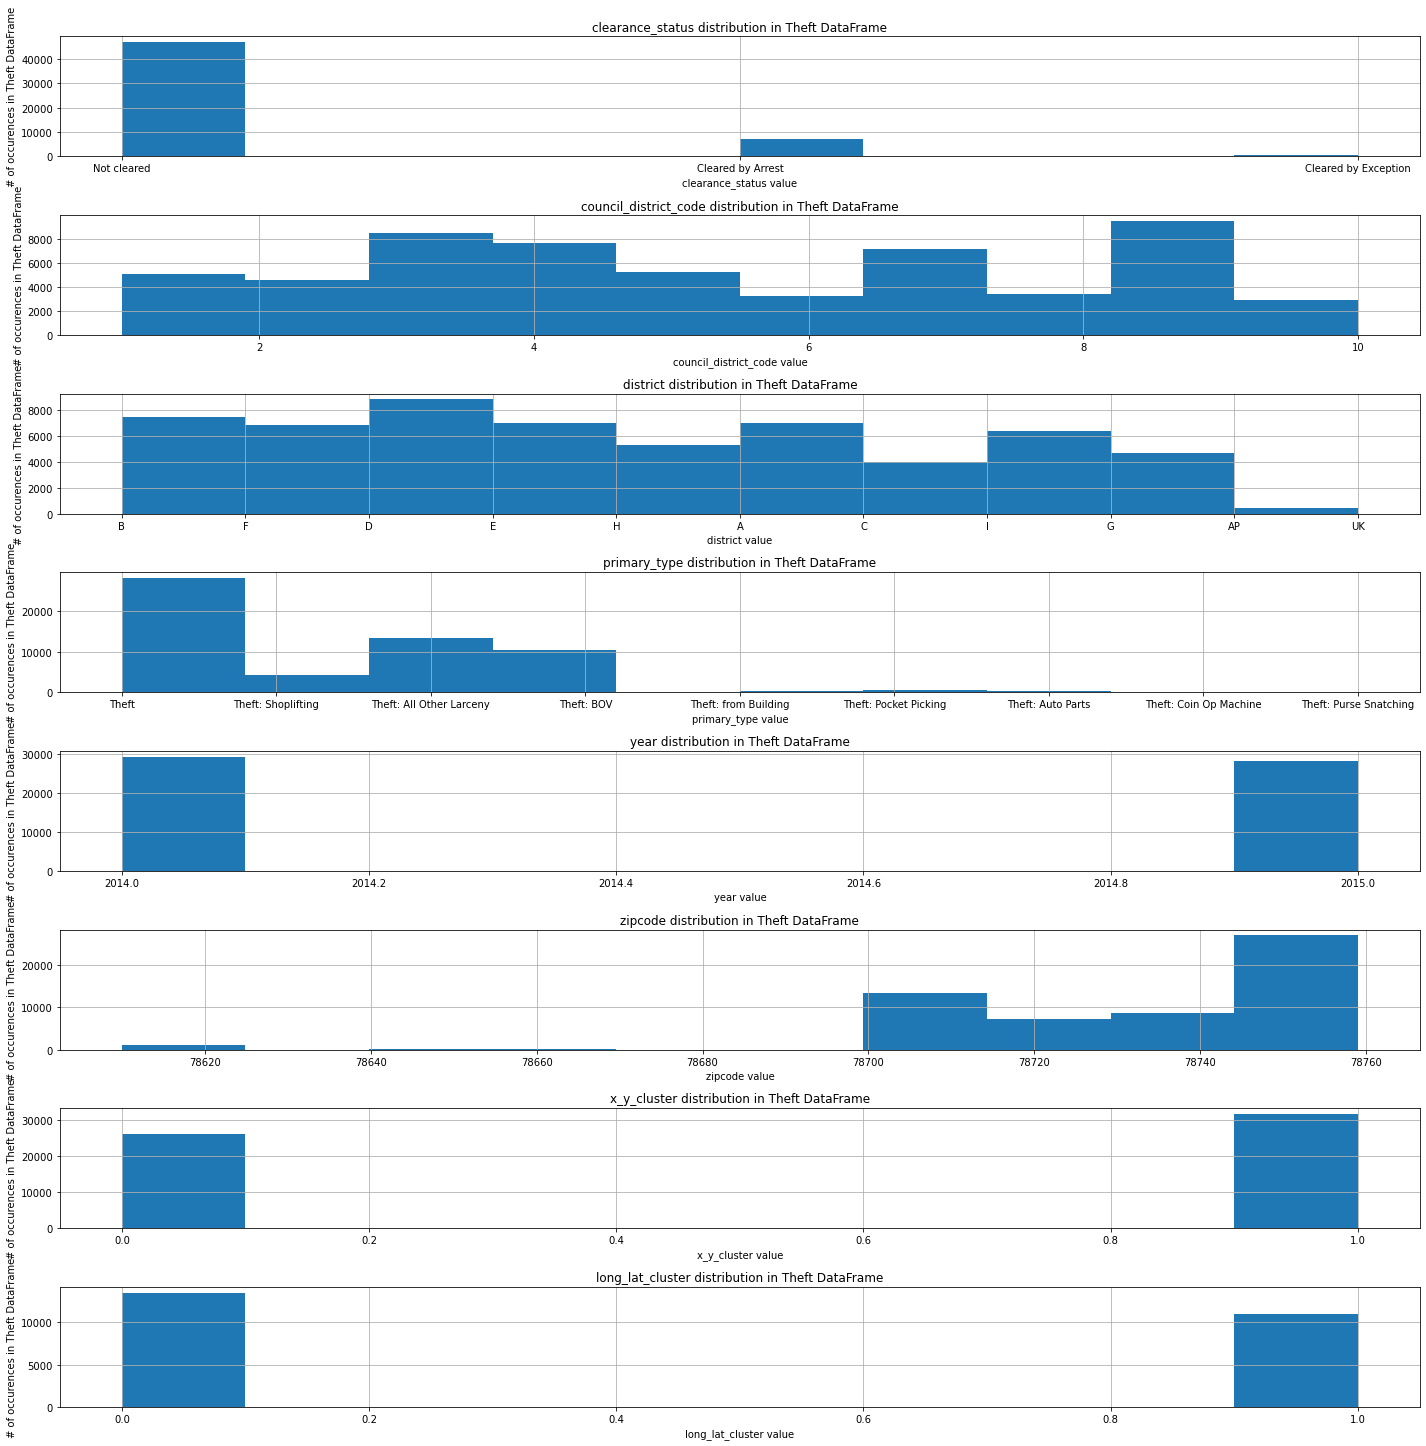

In [46]:
plot_distributions(theft_df,feature_categorical_columns)

In [48]:
Austin_vc_dictionary_categorical = value_counts_dict_on_frame (Austin, categorical_columns)
for entry in Austin_vc_dictionary_categorical.values():
    print(entry)
    print()
    print()

Not cleared             62471
Cleared by Arrest       11275
NaN                      3395
Cleared by Exception     2073
Name: clearance_status, dtype: int64


3.0     12176
9.0     11767
4.0     11412
7.0      9190
1.0      8170
2.0      7068
5.0      6966
6.0      4166
8.0      4155
10.0     3725
NaN       419
Name: council_district_code, dtype: int64


D     11346
E     10599
F      9811
B      9247
I      8971
A      8769
H      8030
C      6317
G      5584
AP      298
UK      242
Name: district, dtype: int64


Theft                                           28274
Theft: All Other Larceny                        13539
Theft: BOV                                      10545
Burglary /                                       5670
Burglary                                         4927
Theft: Shoplifting                               4284
Auto Theft                                       4206
Agg Assault                                      1915
Aggravated Assault                              

(array([57702.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 21512.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

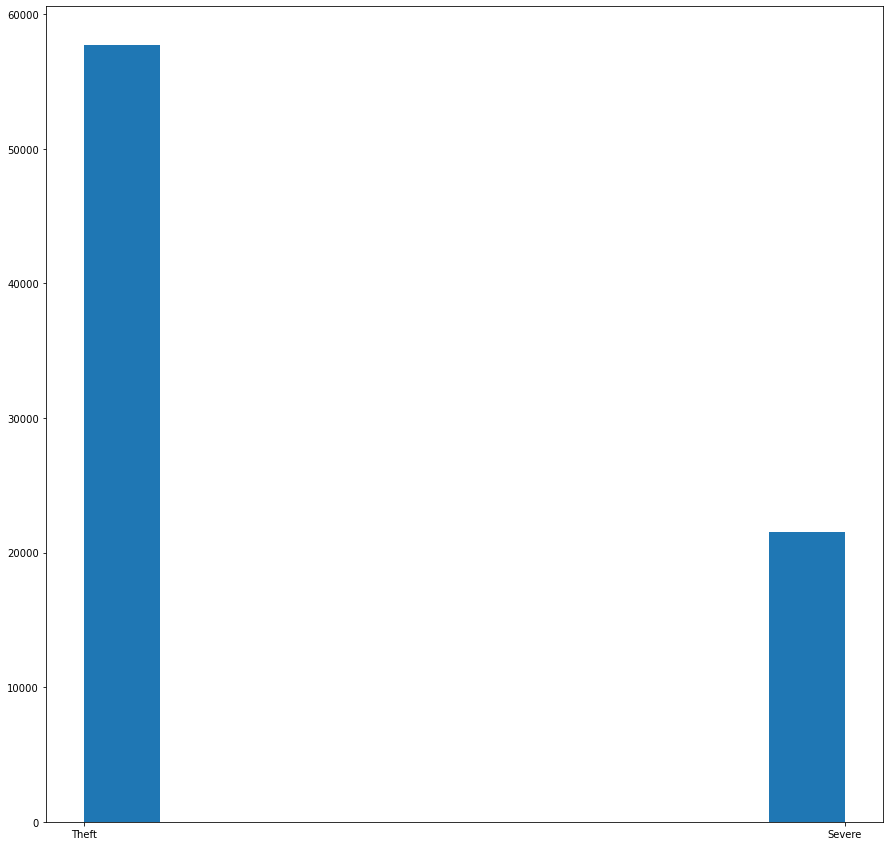

In [59]:
#plot distribution of severe to non severe
severe_ratio = ['Severe' if x==True else 'Theft' for x in Austin['severe']]
fig, ax = plt.subplots(figsize = (15,15))
ax.hist(severe_ratio)

In [69]:
Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,Theft,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,Theft,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,Theft: All Other Larceny,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,Aggravated Assault,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False


In [71]:
# Zero == north in X/y
# Zero == south in Lon/ Lat
# Engineer north/south feature

def locale_judge(df):
    res = []
    for i in range(len(df['x_y_cluster'])):
        row = df.iloc[i,:]
        if row['x_y_cluster'] == 0:
            res.append('North')
            continue
        elif row['x_y_cluster'] == 1:
            res.append('South')
            continue
        elif row['long_lat_cluster']==0:
            res.append('South')
        elif row['long_lat_cluster']==1:
            res.append('North')
        else:
            res.append('No Cluster')
    return res
Austin['North_South'] = locale_judge(Austin)
Austin['North_South'].value_counts()

South         42853
North         35380
No Cluster      981
Name: North_South, dtype: int64

In [72]:
#Small number 981, so will drop
Austin = Austin[Austin['North_South'] != 'No Cluster']
Austin

###QUIT REASSIGNING TO AUSTIN###

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe,North_South
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False,South
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False,South
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False,North
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False,South
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False,North
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True,North
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False,South
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False,North


In [73]:
South_Austin = Austin[Austin['North_South'] == 'South']
South_Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe,North_South
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False,South
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False,South
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False,South
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False,South
9,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,...,2014-04-04 00:00:00,2.014941e+09,3118304.0,10072414.0,2014.0,78702.0,1.0,0.0,True,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159441,Austin TX 78741,23.07,2014-08-21 00:00:00,Not cleared,3.0,BURGLARY OF VEHICLE,H,NaN,NaN,3401 S IH 35 SVRD NB,...,2014-08-16 00:00:00,2.014504e+10,3113742.0,10054371.0,2014.0,78741.0,1.0,NaN,False,South
159446,9900 S IH 35 NB Austin TX 78744,24.21,2015-11-24 00:00:00,Not cleared,5.0,BURGLARY OF VEHICLE,F,NaN,NaN,9900 S IH 35 NB,...,2015-11-11 00:00:00,2.015505e+10,3100231.0,10030025.0,2015.0,78744.0,1.0,NaN,False,South
159447,2100 BARTON SPRINGS RD Austin TX 78746,19.11,2015-08-13 00:00:00,Not cleared,8.0,THEFT,D,NaN,NaN,2100 BARTON SPRINGS RD,...,2015-08-13 00:00:00,2.015504e+10,3106394.0,10070460.0,2015.0,78746.0,1.0,NaN,False,South
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False,South


In [74]:
North_Austin = Austin[Austin['North_South'] == 'North']
North_Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe,North_South
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False,North
10,12901 N IH 35 SVRD NB Austin TX 78753,18.39,2015-10-02 00:00:00,Not cleared,7.0,THEFT BY SHOPLIFTING,E,NaN,NaN,12901 N IH 35 SVRD NB,...,2015-06-25 00:00:00,2.015176e+10,3135313.0,10124219.0,2015.0,78753.0,0.0,NaN,False,North
11,11001 CAIRNHILL CT Austin TX 78754,18.559999999999999,2015-05-19 00:00:00,Not cleared,1.0,BURGLARY NON RESIDENCE,C,NaN,NaN,11001 CAIRNHILL CT,...,2015-05-15 00:00:00,2.015502e+10,3152073.0,10100014.0,2015.0,78754.0,0.0,NaN,True,North
20,(30.356418 -97.731423),18.170000000000002,2014-04-17 00:00:00,Not cleared,7.0,THEFT,B,30.356418,(30.356418-97.731423),2438 W ANDERSON LN,...,2014-04-16 00:00:00,2.014502e+10,3117183.0,10103211.0,2014.0,78757.0,0.0,1.0,False,North
21,12203 ALDERBROOK DR Austin TX 78758,18.5,2015-08-18 00:00:00,Not cleared,7.0,THEFT,A,NaN,NaN,12203 ALDERBROOK DR,...,2015-06-27 00:00:00,2.015503e+10,3126309.0,10122749.0,2015.0,78758.0,0.0,NaN,False,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159445,7302 GRASS CV Austin TX 78759,17.559999999999999,NaN,NaN,10.0,THEFT,A,NaN,NaN,7302 GRASS CV,...,2015-10-13 00:00:00,2.015505e+10,3104840.0,10128668.0,2015.0,78759.0,0.0,NaN,False,North
159450,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,...,2014-11-25 00:00:00,2.014505e+10,3139137.0,10088360.0,2014.0,78724.0,0.0,1.0,False,North
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False,North
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True,North


<BarContainer object of 2 artists>

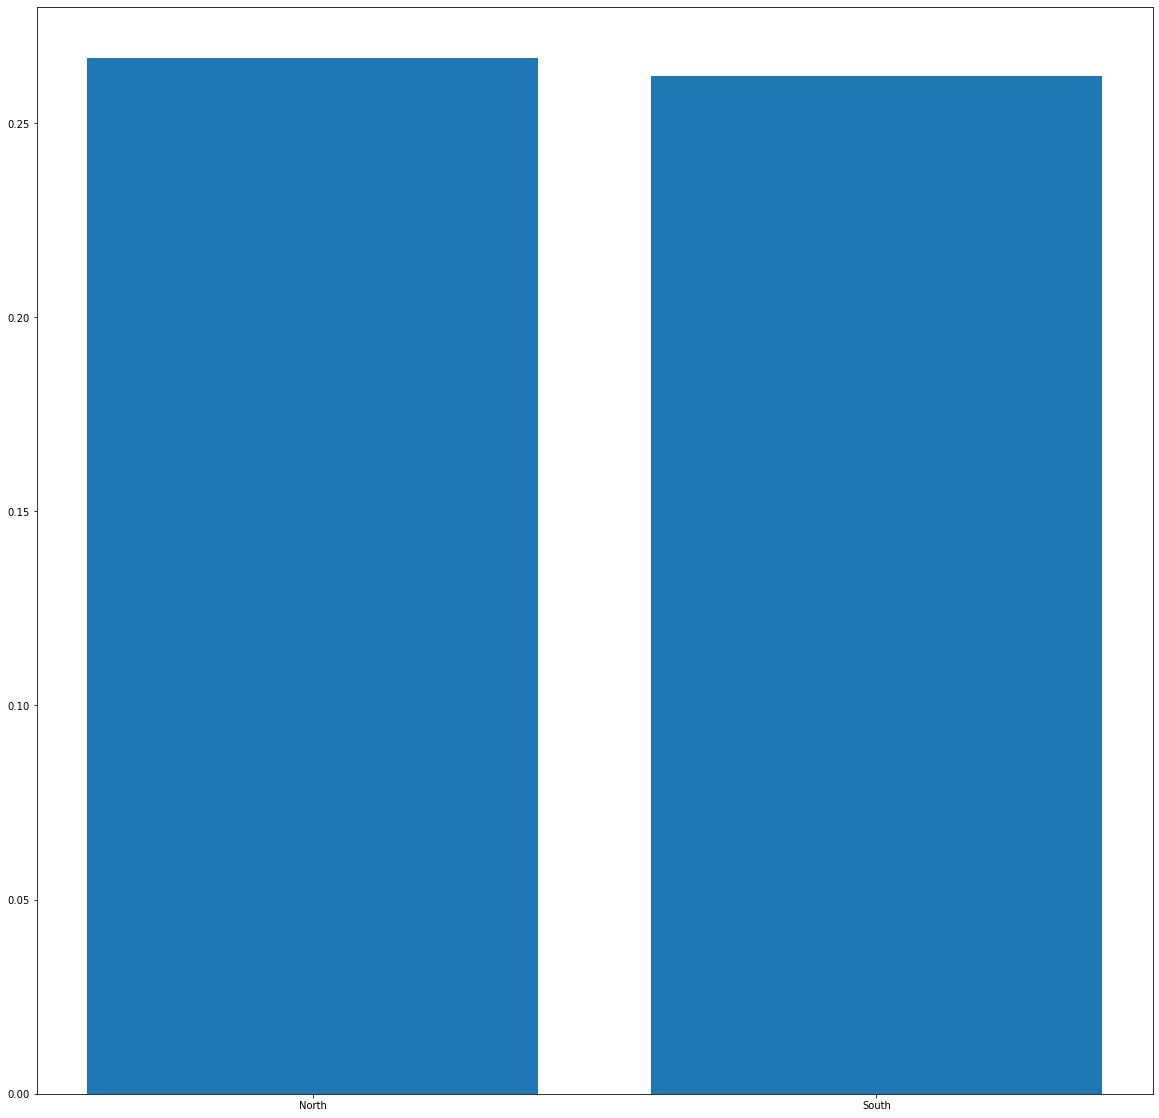

In [79]:
#plot severe vs non severe in North vs South

North_severe_ratio = sum(North_Austin['severe']/ len(North_Austin['severe']))
South_severe_ratio = sum(South_Austin['severe']/ len(South_Austin['severe']))
severe_ratio_comparison_container  = [North_severe_ratio, South_severe_ratio]
fig, ax = plt.subplots(figsize = (20,20))
x = ['North', 'South']
height = severe_ratio_comparison_container
ax.bar(x, height)

In [ ]:
#based on above image, below image and brief research, pivot to 9 clusters

####Insert Austin crime lab photo

In [104]:
x_y_df = pd.DataFrame(Austin[['x_coordinate', 'y_coordinate']]).dropna()
long_lat_df = pd.DataFrame(Austin[['longitude', 'latitude']]).dropna()

In [105]:
# Chose to use K-Means, k = 9, for both clusters
# Create series containing cluster_id for both DataFrames
lon_lat_cluster = KMeans(n_clusters = 9, algorithm = 'full').fit_predict(long_lat_df)
x_y_cluster_series = KMeans(n_clusters = 9, algorithm = 'full').fit_predict(x_y_df)

In [106]:
lon_lat_9c = pd.Series(lon_lat_cluster)
lon_lat_9c.value_counts()

0    5891
3    5436
5    4731
4    3963
8    3848
2    3485
6    3027
7    2445
1    1674
dtype: int64

In [107]:
x_y_9c = pd.Series(x_y_cluster_series)
x_y_9c.value_counts()

5    14293
1    12526
8     9494
2     8240
0     7517
7     7356
4     5643
3     3944
6     3260
dtype: int64

(array([5891., 1674., 3485., 5436., 3963., 4731., 3027., 6293.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 8 artists>)

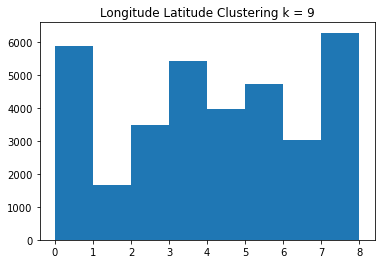

In [108]:
fig, ax = plt.subplots()
ax.set_title('Longitude Latitude Clustering k = 9')
ax.hist(lon_lat_9c, bins = list(range(9)))

(array([ 7517., 12526.,  8240.,  3944.,  5643., 14293.,  3260., 16850.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <BarContainer object of 8 artists>)

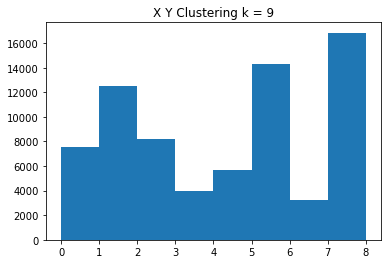

In [109]:
fig, ax = plt.subplots()
ax.set_title('X Y Clustering k = 9')
ax.hist(x_y_9c, bins = list(range(9)))

In [110]:
df_9 = Austin.copy()
df_9

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe,North_South
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False,South
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False,South
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False,North
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False,South
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False,North
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True,North
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False,South
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False,North


In [111]:
#Add 9n clustering to DF
x_y_df['xy_9'] = x_y_9c
long_lat_df['lon_lat_9'] = lon_lat_9c

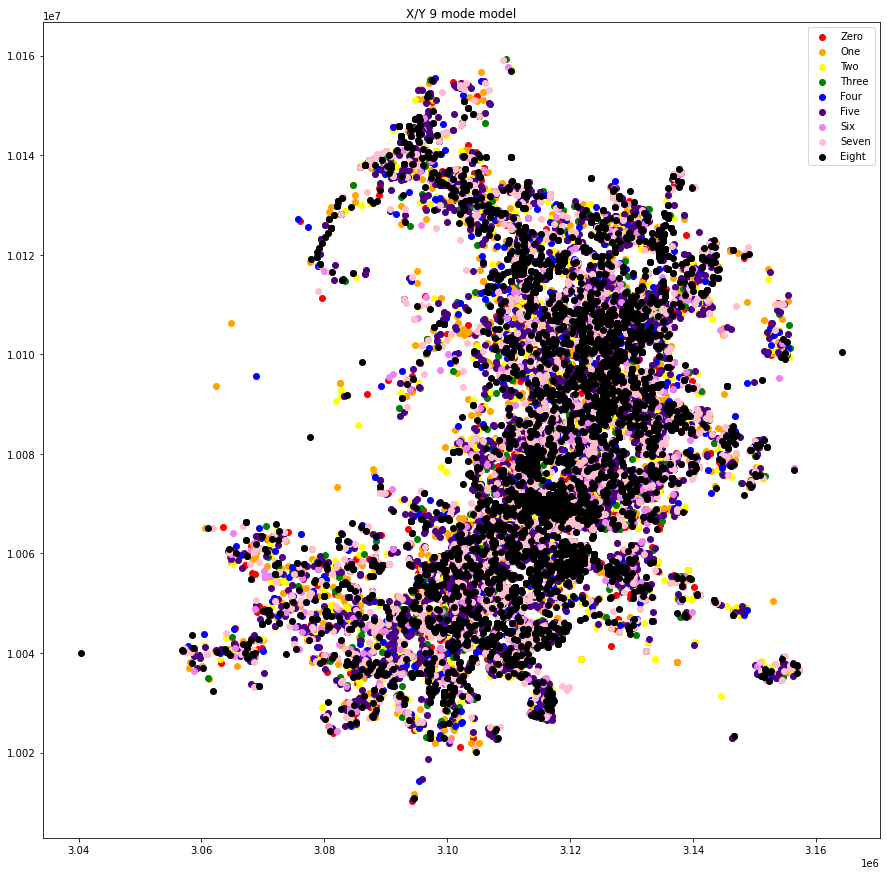

In [112]:
#Plot X/Y model

Austin_x_y = Austin
cluster_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight']
cluster_dfs = []
for i in range(9):
    df = x_y_df[x_y_df['xy_9'] == i]
    df.name = cluster_names[i]
    cluster_dfs.append(df)
    
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'pink', 'black', 'grey']
fig, ax = plt.subplots(figsize = (15,15))
for i,df in enumerate(cluster_dfs):
    ax.scatter(df['x_coordinate'], df['y_coordinate'], c = colors[i], label = df.name, alpha = 1)
ax.set_title('X/Y 9 mode model')
ax.legend()

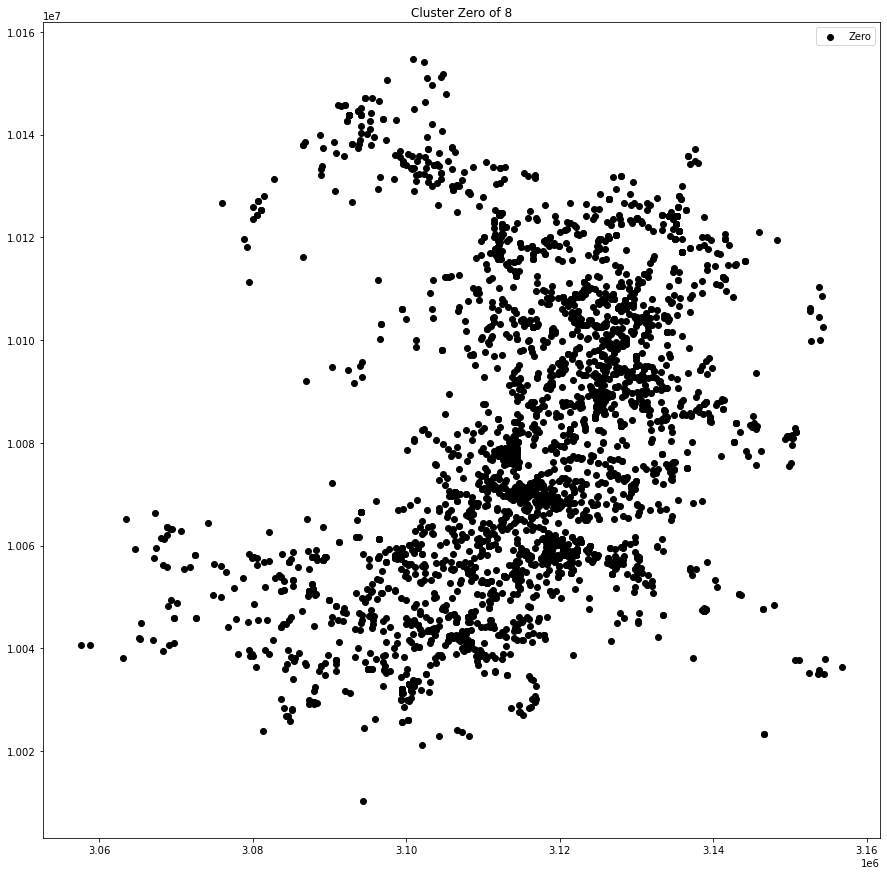

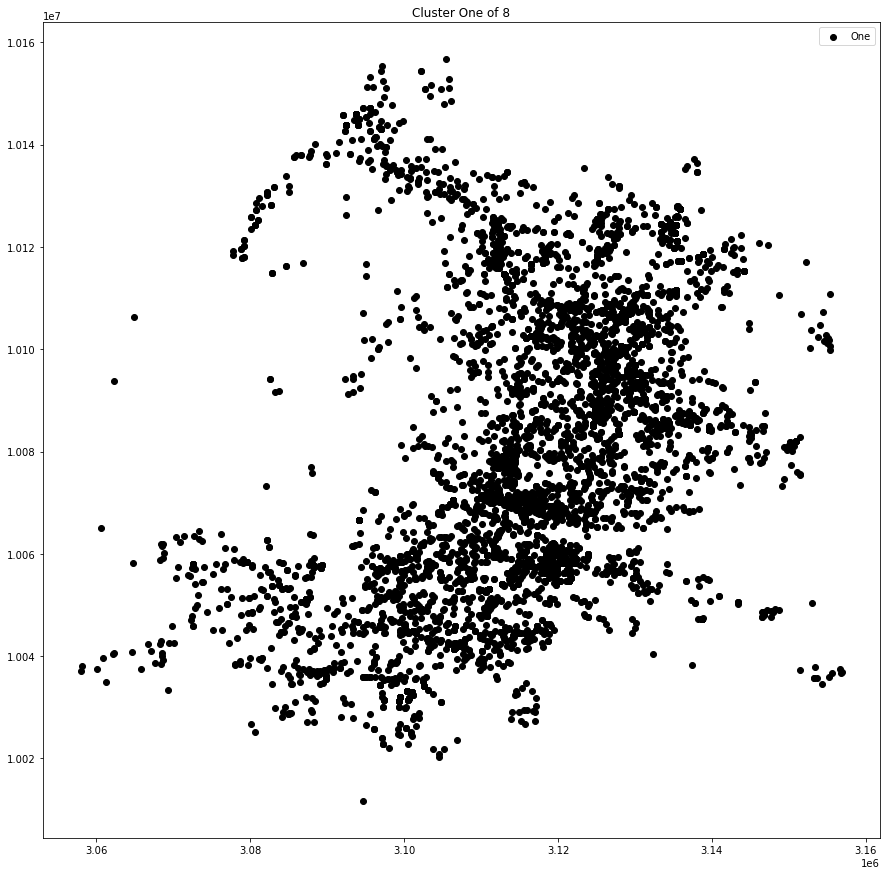

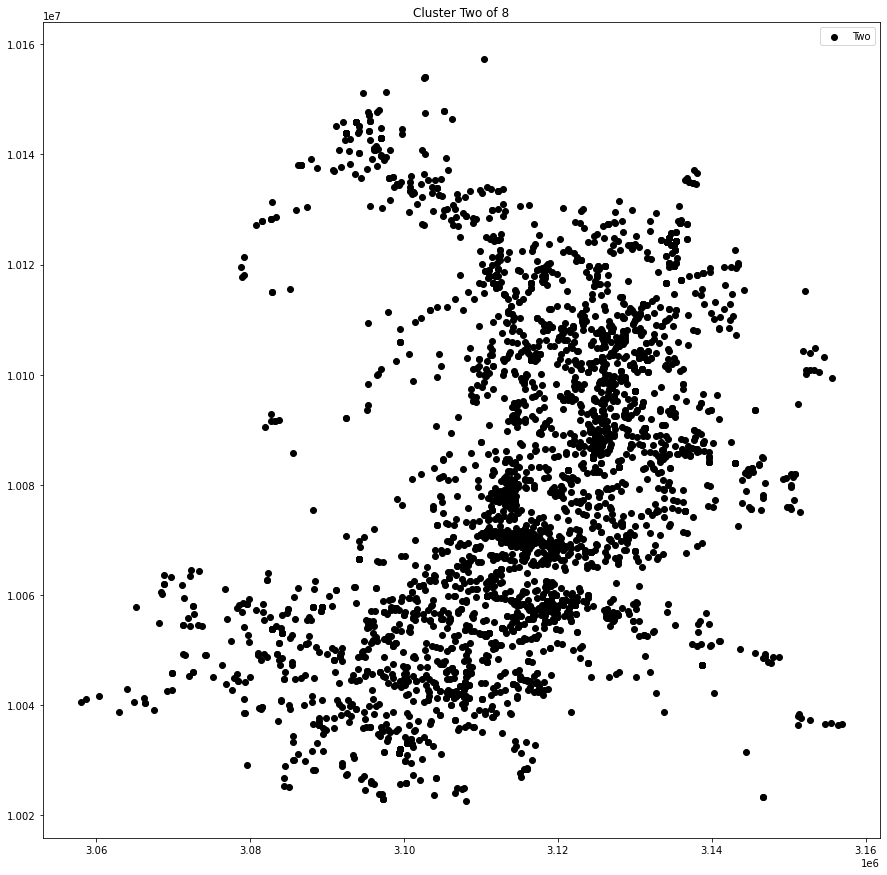

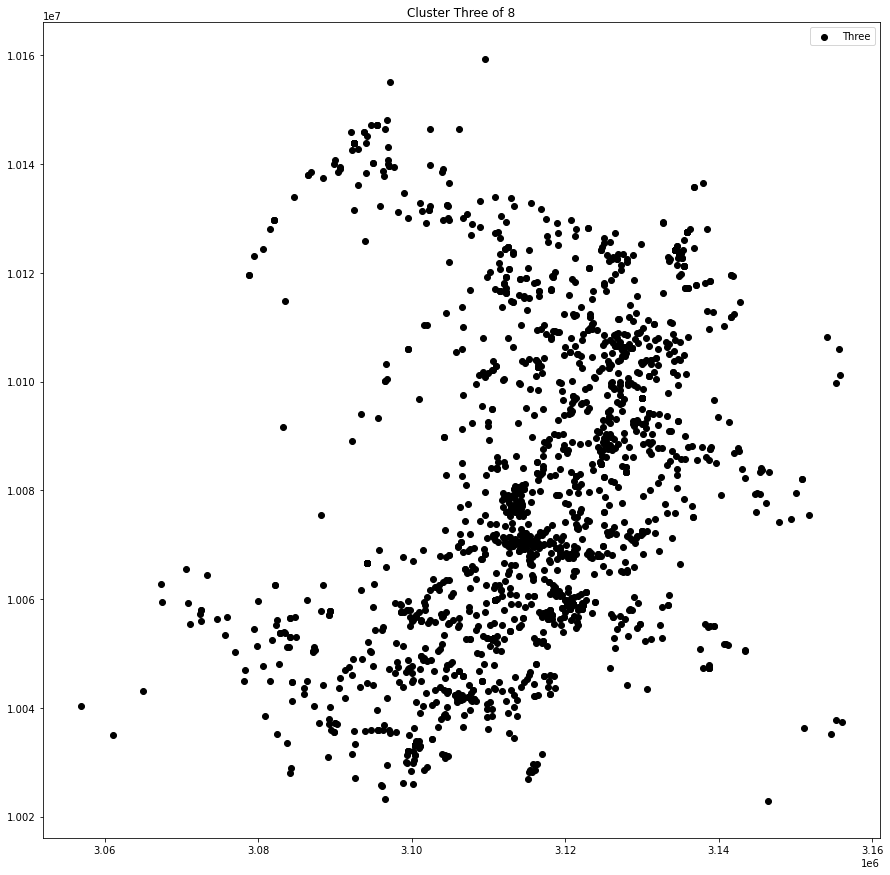

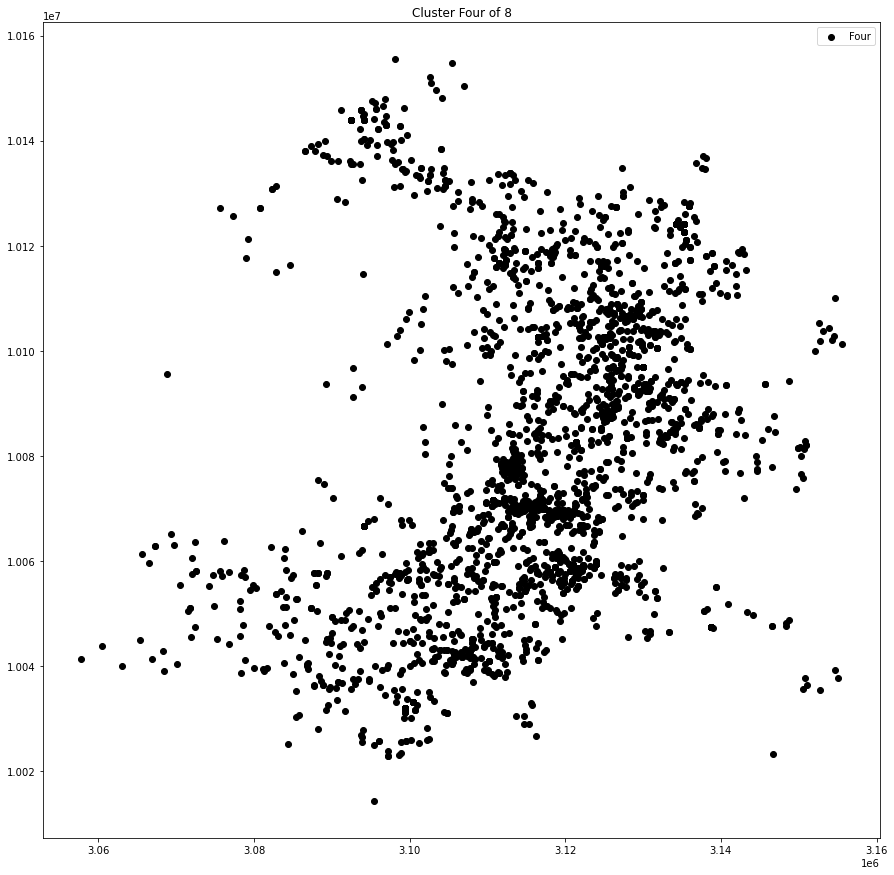

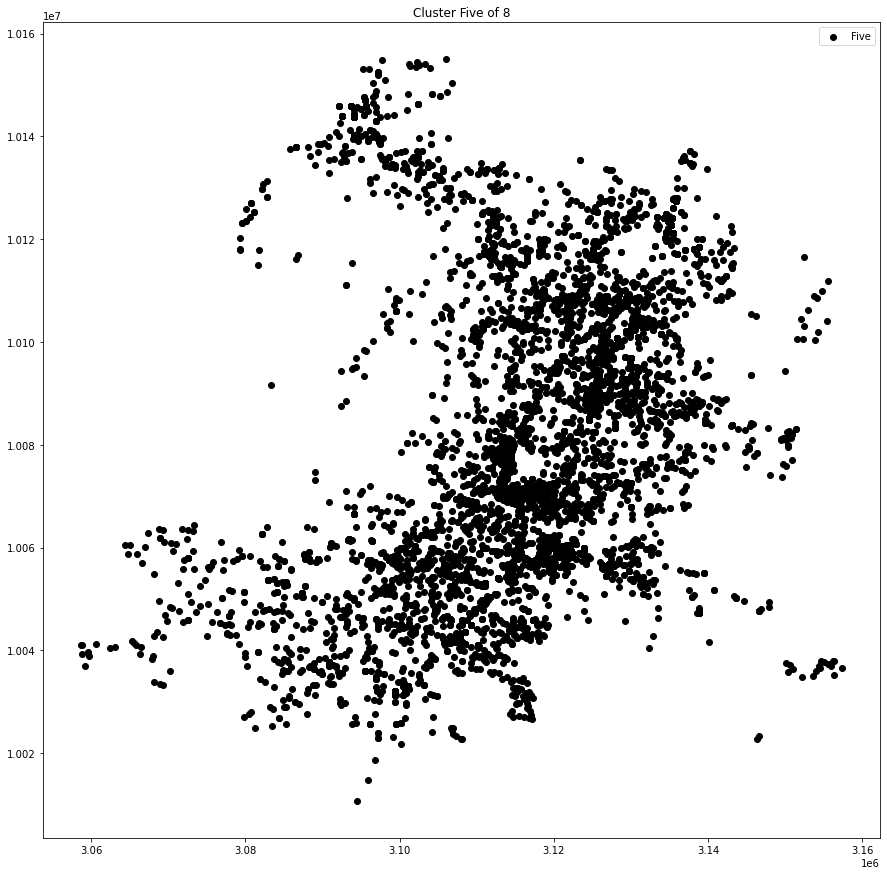

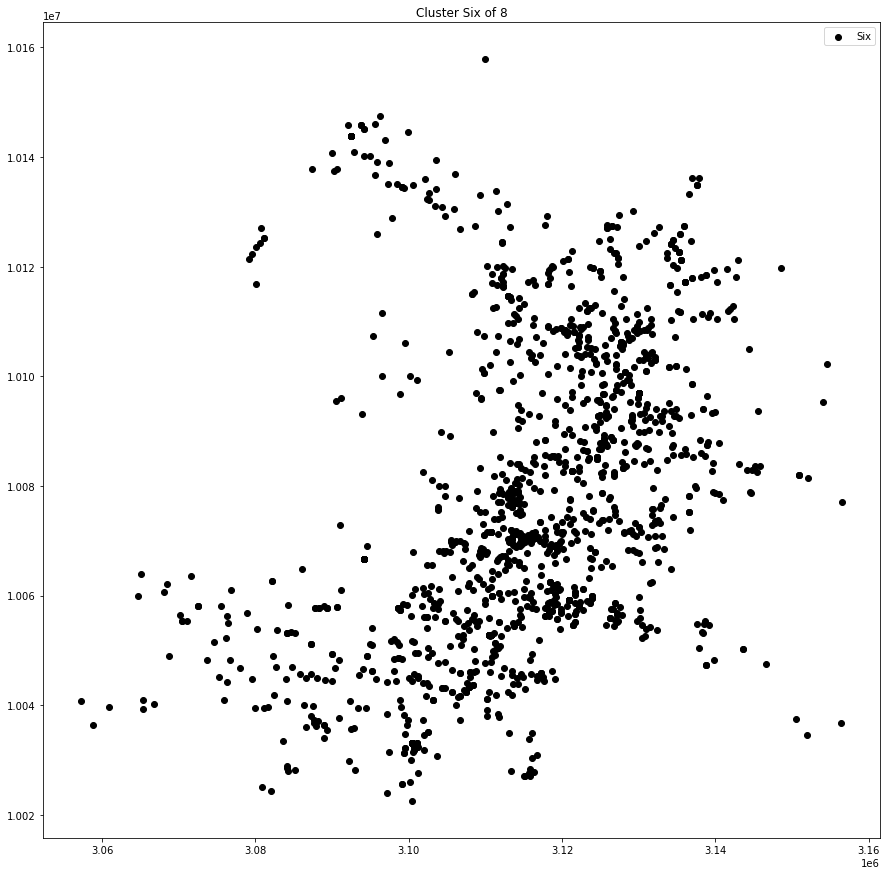

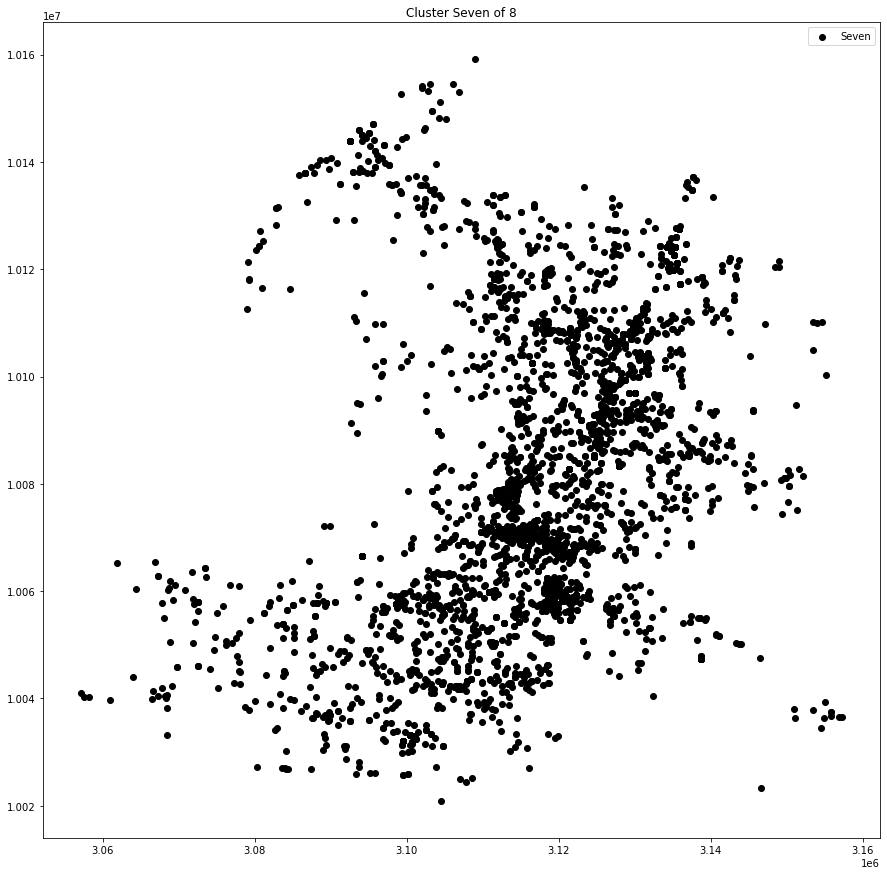

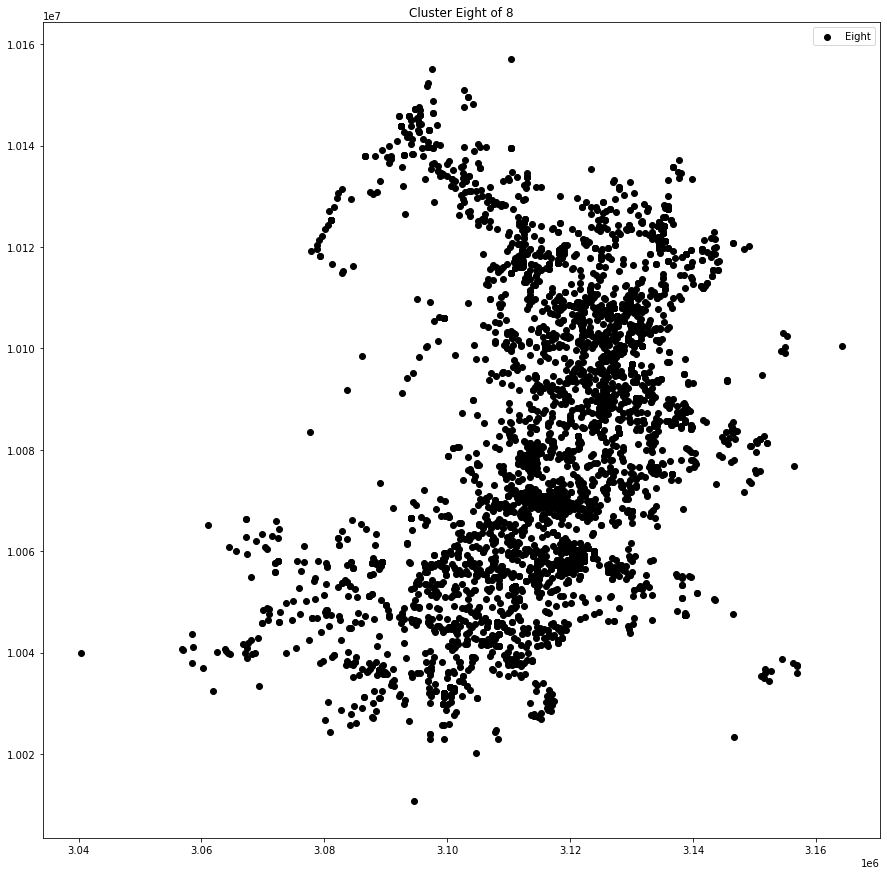

In [113]:
for df in cluster_dfs:
    fig, ax = plt.subplots(figsize = (15,15))
    ax.scatter(df['x_coordinate'], df['y_coordinate'], c = colors[i], label = df.name, alpha = 1)
    ax.set_title(f'Cluster {df.name} of {len(cluster_dfs) - 1}')
    ax.legend()

In [114]:
### Discontinue the 9 cluster project :'D '

In [115]:
Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe,North_South
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False,South
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False,South
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False,North
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,2015-01-02 00:00:00,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False,South
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,2015-07-28 00:00:00,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,2014-03-26 00:00:00,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False,North
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,2014-12-28 00:00:00,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True,North
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False,South
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False,North


In [116]:
Austin['timestamp'].value_counts()

2015-08-03 00:00:00    157
2015-07-24 00:00:00    157
2014-10-13 00:00:00    152
2015-12-21 00:00:00    152
2015-07-21 00:00:00    148
                      ... 
2015-12-25 00:00:00     54
2014-03-09 00:00:00     54
2014-11-27 00:00:00     52
2015-02-28 00:00:00     45
2014-12-25 00:00:00     34
Name: timestamp, Length: 730, dtype: int64

In [118]:
Austin['timestamp']

0         2015-12-13 00:00:00
1         2015-09-03 00:00:00
4         2014-04-04 00:00:00
5         2015-01-02 00:00:00
6         2015-07-28 00:00:00
                 ...         
159453    2014-03-26 00:00:00
159456    2014-12-28 00:00:00
159459    2014-06-03 00:00:00
159460    2015-12-30 00:00:00
159463    2014-06-30 00:00:00
Name: timestamp, Length: 78233, dtype: object

In [125]:
Austin['timestamp'] = pd.to_datetime(Austin['timestamp'], infer_datetime_format= True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
Austin

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode,x_y_cluster,long_lat_cluster,severe,North_South
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,2015-12-13,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0,1.0,NaN,False,South
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,2015-09-03,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0,1.0,NaN,False,South
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,2014-04-04,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0,0.0,1.0,False,North
5,710 E BEN WHITE BLVD EB Austin TX 78745,24.03,2015-01-07 00:00:00,Cleared by Arrest,3.0,THEFT BY SHOPLIFTING,D,NaN,NaN,710 E BEN WHITE BLVD EB,...,2015-01-02,2.015209e+08,3110518.0,10052730.0,2015.0,78745.0,1.0,NaN,False,South
6,4809 CABOB ST Austin TX 78744,24.13,2015-08-05 00:00:00,Not cleared,2.0,BURGLARY OF VEHICLE,F,NaN,NaN,4809 CABOB ST,...,2015-07-28,2.015209e+10,3115006.0,10043258.0,2015.0,78744.0,1.0,NaN,False,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,2014-03-26,2.014851e+09,3144046.0,10117185.0,2014.0,78753.0,0.0,1.0,False,North
159456,(30.405797 -97.74491),17.54,2015-01-04 00:00:00,Not cleared,7.0,AGG ASLT ENHANC STRANGL/SUFFOC,A,30.405797,(30.405797-97.74491),11111 RESEARCH BLVD SVRD NB,...,2014-12-28,2.014362e+10,3112507.0,10120833.0,2014.0,78759.0,0.0,1.0,True,North
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,2014-06-03,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0,1.0,0.0,False,South
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,2015-12-30,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0,0.0,NaN,False,North


In [127]:
Austin.columns

Index(['address', 'census_tract', 'clearance_date', 'clearance_status',
       'council_district_code', 'description', 'district', 'latitude',
       'location', 'location_description', 'longitude', 'primary_type',
       'timestamp', 'unique_key', 'x_coordinate', 'y_coordinate', 'year',
       'zipcode', 'x_y_cluster', 'long_lat_cluster', 'severe', 'North_South'],
      dtype='object')

In [131]:
columns_to_drop = ['address', 'clearance_date', 'clearance_status',
       'description', 'latitude',
       'location', 'location_description', 'longitude',
       'timestamp', 'x_coordinate', 'y_coordinate', 'year',
       'x_y_cluster', 'long_lat_cluster']

In [150]:
feature_df = Austin.copy()

In [151]:
feature_df = feature_df.drop(columns_to_drop, axis = 1)

In [152]:
feature_df

,census_tract,council_district_code,district,primary_type,unique_key,zipcode,severe,North_South
0,6.03,9.0,B,Theft,2.015505e+10,78705.0,False,South
1,24.21,5.0,F,Theft,2.015246e+10,78748.0,False,South
4,3.02,9.0,B,Theft: Shoplifting,2.014941e+09,78751.0,False,North
5,24.03,3.0,D,Theft,2.015209e+08,78745.0,False,South
6,24.13,2.0,F,Theft,2.015209e+10,78744.0,False,South
...,...,...,...,...,...,...,...,...
159453,18.39,7.0,E,Theft: All Other Larceny,2.014851e+09,78753.0,False,North
159456,17.54,7.0,A,Aggravated Assault,2.014362e+10,78759.0,True,North
159459,24.31,2.0,F,Theft: All Other Larceny,2.014502e+10,78744.0,False,South
159460,17.22,10.0,A,Theft,2.015506e+10,78759.0,False,North


In [153]:
feature_df['year'] = Austin['timestamp'].dt.year
feature_df['month'] = Austin['timestamp'].dt.month
feature_df['day'] = Austin['timestamp'].dt.day
feature_df['day_name'] = Austin['timestamp'].dt.day_name()
#feature_df['weekend'] = [True if feature_df['day'] in ['Sunday', 'Saturday']]
feature_df['season'] = Austin['timestamp'].dt.quarter

feature_df

,census_tract,council_district_code,district,primary_type,unique_key,zipcode,severe,North_South,year,month,day,day_name,season
0,6.03,9.0,B,Theft,2.015505e+10,78705.0,False,South,2015.0,12.0,13.0,Sunday,4.0
1,24.21,5.0,F,Theft,2.015246e+10,78748.0,False,South,2015.0,9.0,3.0,Thursday,3.0
4,3.02,9.0,B,Theft: Shoplifting,2.014941e+09,78751.0,False,North,2014.0,4.0,4.0,Friday,2.0
5,24.03,3.0,D,Theft,2.015209e+08,78745.0,False,South,2015.0,1.0,2.0,Friday,1.0
6,24.13,2.0,F,Theft,2.015209e+10,78744.0,False,South,2015.0,7.0,28.0,Tuesday,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159453,18.39,7.0,E,Theft: All Other Larceny,2.014851e+09,78753.0,False,North,2014.0,3.0,26.0,Wednesday,1.0
159456,17.54,7.0,A,Aggravated Assault,2.014362e+10,78759.0,True,North,2014.0,12.0,28.0,Sunday,4.0
159459,24.31,2.0,F,Theft: All Other Larceny,2.014502e+10,78744.0,False,South,2014.0,6.0,3.0,Tuesday,2.0
159460,17.22,10.0,A,Theft,2.015506e+10,78759.0,False,North,2015.0,12.0,30.0,Wednesday,4.0
